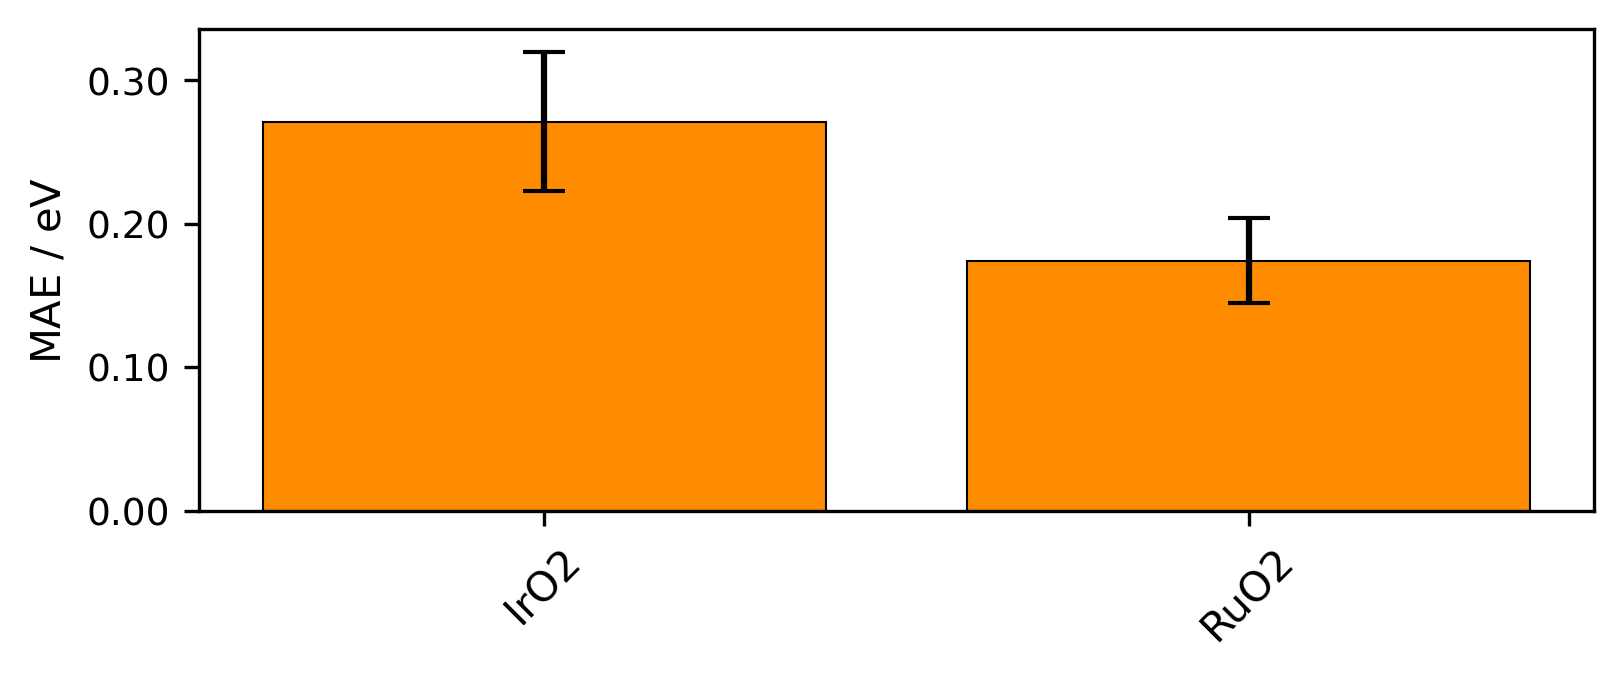

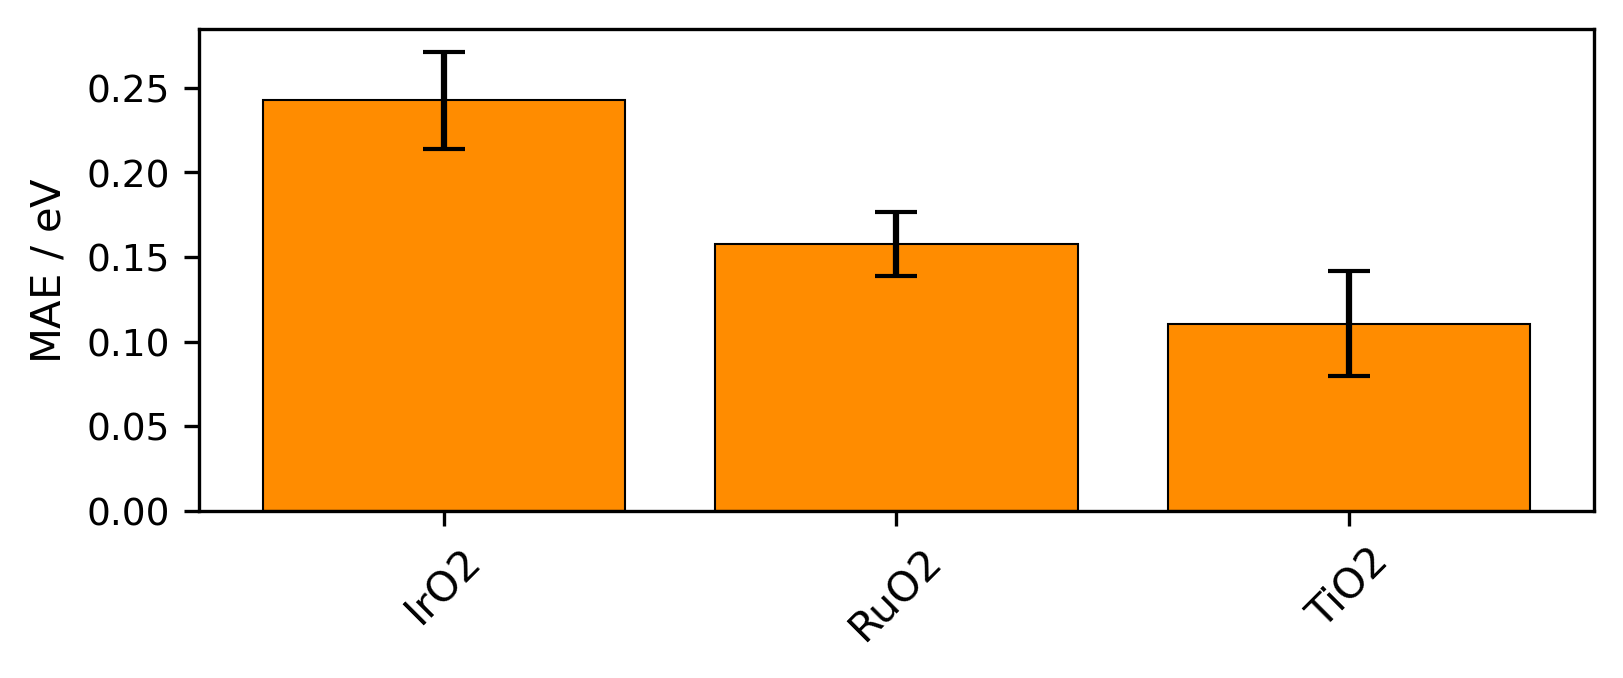

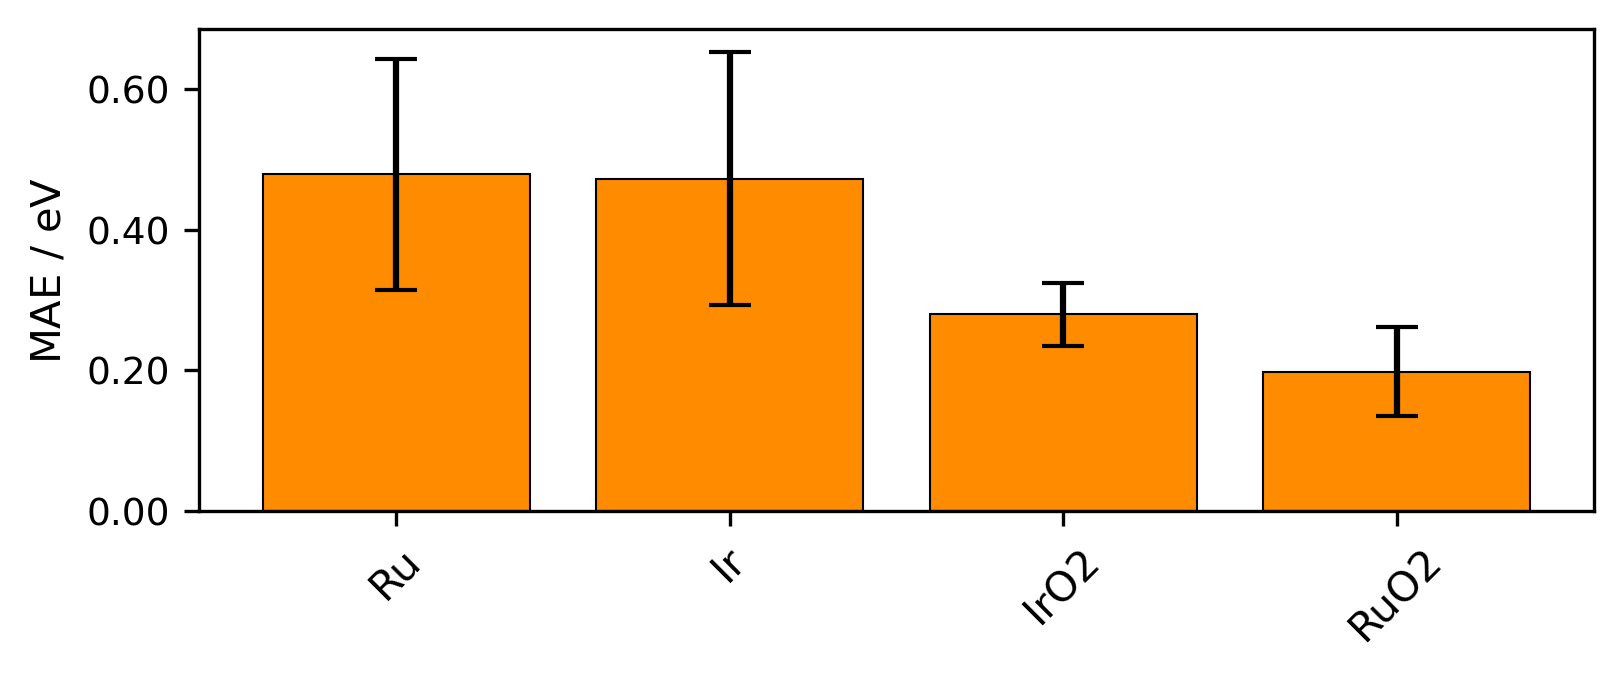

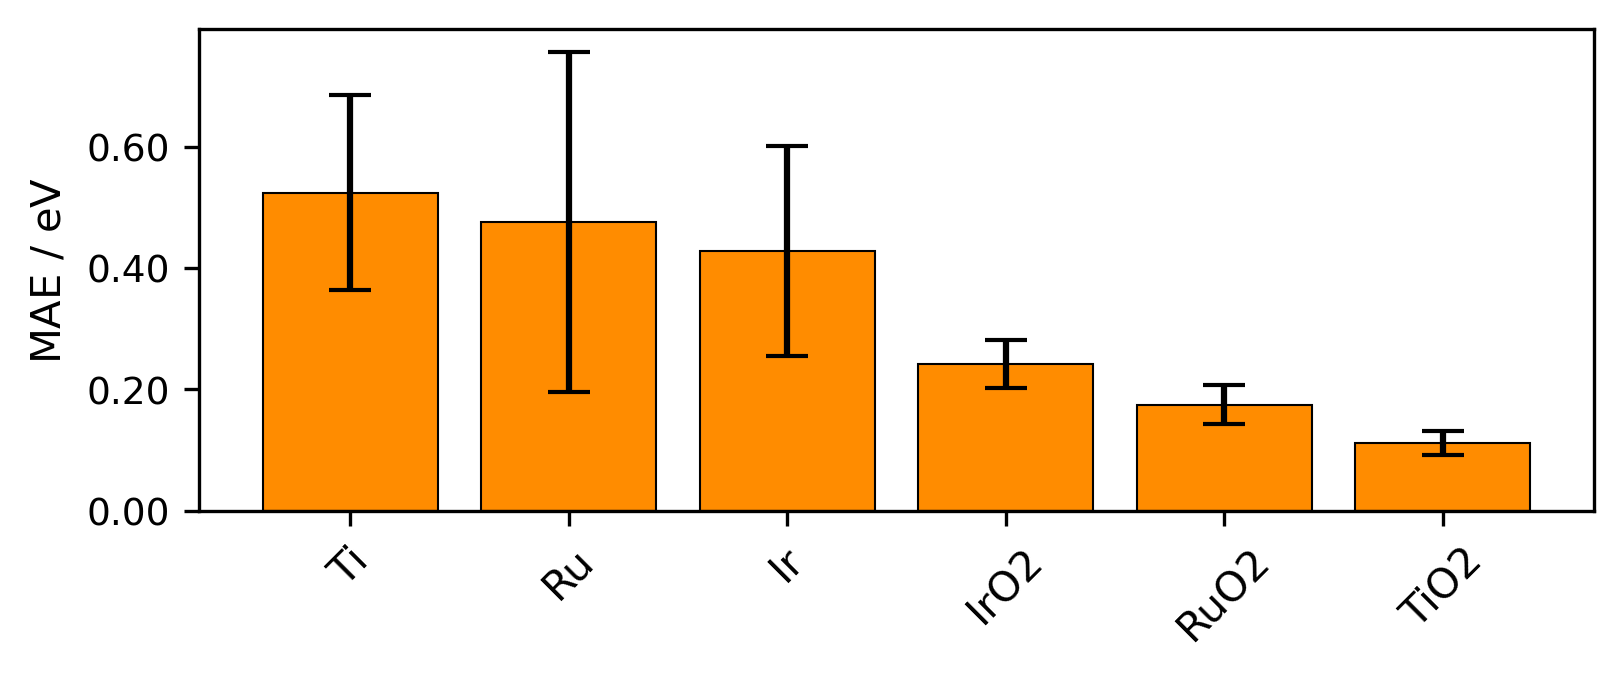

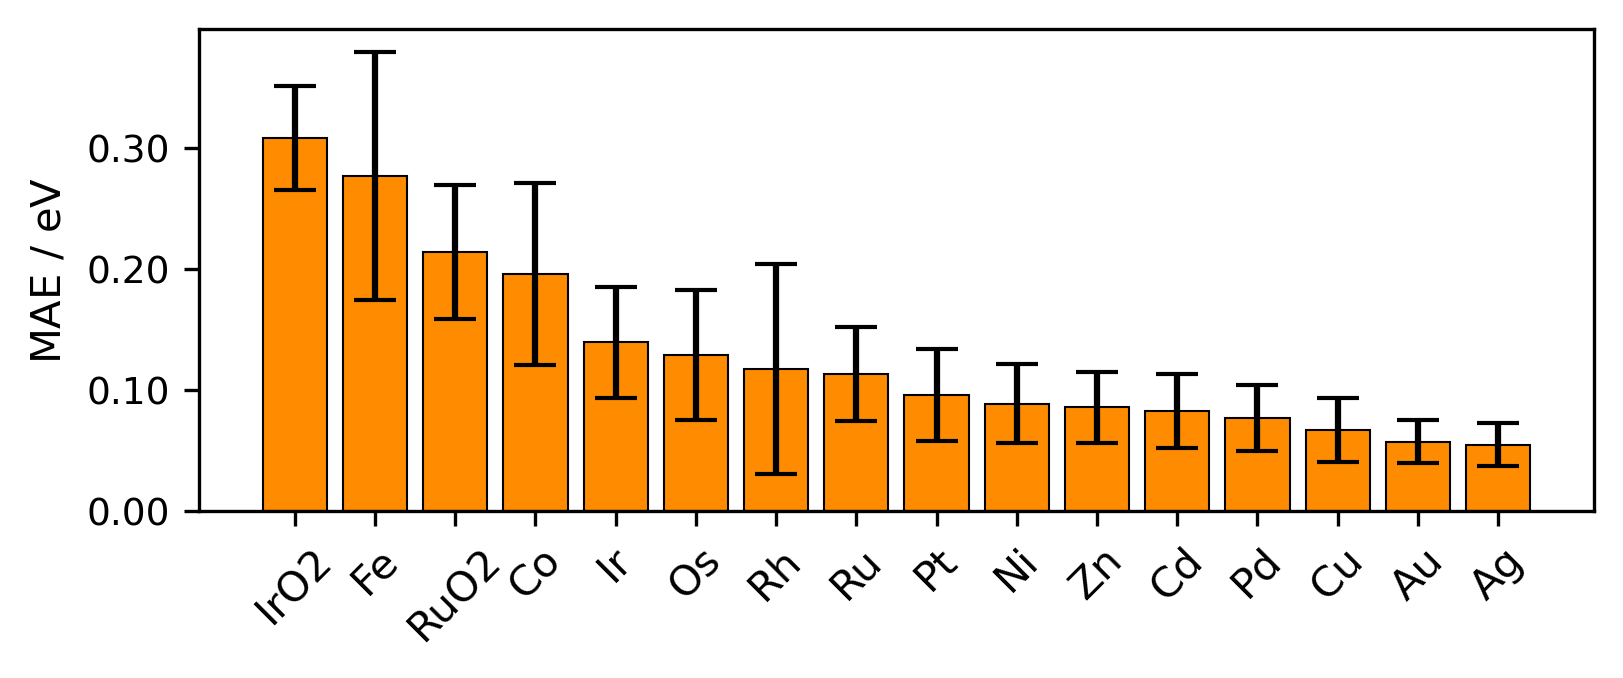

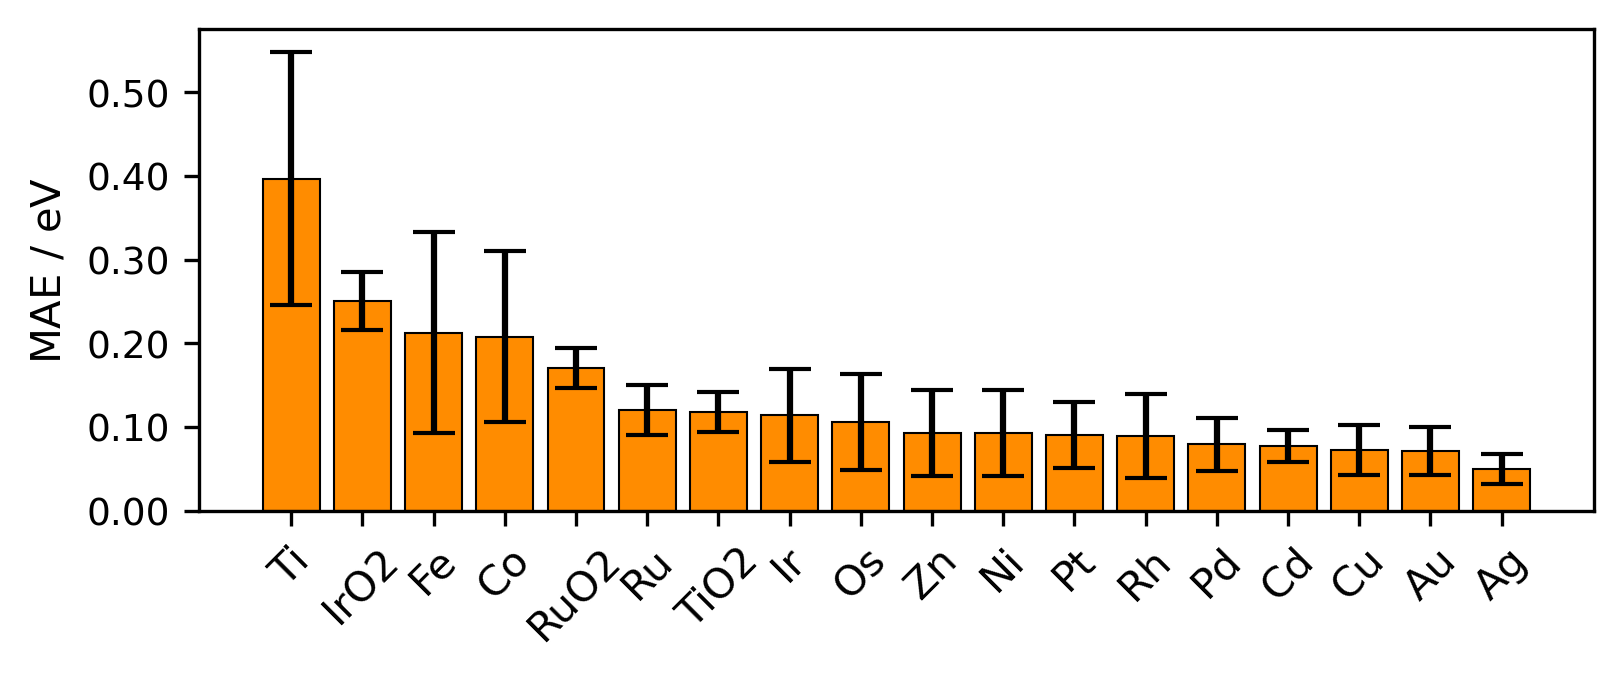

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.metrics import r2_score
import matplotlib.cm as cm

# Font settings
legend_font = FontProperties(family='Arial', style='normal', size=9)

# Base path to all datasets
base_path = "/home/tvanhout/oxides_ML/models/NCV/"

# List of subdirectories (each is one NCV experiment)
directories = ["Db1", "Db1_TiO2", 
               "Db2", "Db2_TiO2",
               "Db3", "Db3_TiO2",]

# Human-readable x-axis labels (must match order of 'directories')
xtick_labels = ["Db1", "Db1 w/ Ti",
                "Db2", "Db2 w/ Ti",
                "Db3", "Db3 w/ Ti"]

# Store results
db_material_results = {}

for dir_name in directories:
    df_path = os.path.join(base_path, dir_name, "summary.csv")
    df = pd.read_csv(df_path)

    data_col = df.columns[0]
    all_dfs = []
    for _, row in df.iterrows():
        row_data = row[data_col].split(",")
        run_id = row["run"]
        all_dfs.append(row_data + [run_id])

    df_summary = pd.DataFrame(all_dfs, columns=[
        "System", "Material", "Surface", "Molecule Group", "Molecule",
        "State", "Dissociation", "True_eV", "Prediction_eV",
        "Error_eV", "Abs_error_eV", "run"
    ])
    df_summary[["True_eV", "Prediction_eV", "Error_eV", "Abs_error_eV"]] = \
        df_summary[["True_eV", "Prediction_eV", "Error_eV", "Abs_error_eV"]].astype(float)

    # Get database group name (e.g., Db1)
    db_group = dir_name.split("_")[0]

    # Calculate nested MAE per material
    material_grouped = df_summary.groupby(["Material", "run"])["Abs_error_eV"].mean().reset_index()
    nested_mae_per_material = material_grouped.groupby("Material")["Abs_error_eV"].agg(["mean", "std"]).reset_index()
    nested_mae_per_material.columns = ["Material", "MAE", "STD"]

    # Sort from highest to lowest MAE
    nested_mae_per_material.sort_values(by="MAE", ascending=False, inplace=True)

    db_material_results[db_group] = nested_mae_per_material
# Human-readable titles for each directory
title_map = {
    "Db1_lr0": "Db1",
    "Db1_TiO2_lr0": "Db1 w/ Ti",
    "Db2_lr0": "Db2",
    "Db2_TiO2_lr0": "Db2 w/ Ti",
    "Db3_test": "Db3",
    "Db3_TiO2_test": "Db3 w/ Ti"
}

# Plot per directory (one per experiment)
for dir_name in directories:
    df_path = os.path.join(base_path, dir_name, "summary.csv")
    df = pd.read_csv(df_path)

    data_col = df.columns[0]
    all_dfs = []
    for _, row in df.iterrows():
        row_data = row[data_col].split(",")
        run_id = row["run"]
        all_dfs.append(row_data + [run_id])

    df_summary = pd.DataFrame(all_dfs, columns=[
        "System", "Material", "Surface", "Molecule Group", "Molecule",
        "State", "Dissociation", "True_eV", "Prediction_eV",
        "Error_eV", "Abs_error_eV", "run"
    ])
    df_summary[["True_eV", "Prediction_eV", "Error_eV", "Abs_error_eV"]] = \
        df_summary[["True_eV", "Prediction_eV", "Error_eV", "Abs_error_eV"]].astype(float)

    # Calculate nested MAE per material
    material_grouped = df_summary.groupby(["Material", "run"])["Abs_error_eV"].mean().reset_index()
    nested_mae_per_material = material_grouped.groupby("Material")["Abs_error_eV"].agg(["mean", "std"]).reset_index()
    nested_mae_per_material.columns = ["Material", "MAE", "STD"]
    nested_mae_per_material.sort_values(by="MAE", ascending=False, inplace=True)

    # Plot
    fig, ax = plt.subplots(figsize=(14/2.54, 6/2.54), dpi=300)

    materials = nested_mae_per_material["Material"].tolist()

    bars = ax.bar(
        materials,
        nested_mae_per_material["MAE"],
        yerr=nested_mae_per_material["STD"],
        capsize=5,
        color="darkorange",  # consistent single color
        edgecolor="black",
        linewidth=0.5
    )

    ax.set_ylabel(r"$\it{\mathrm{MAE}}$ / eV", fontproperties=legend_font.copy().set_size(11))
    ax.set_xticks(np.arange(len(materials)))
    ax.set_xticklabels(materials, rotation=45, ha="center", fontproperties=legend_font.copy().set_size(9))
    ax.tick_params(axis='y', labelsize=9)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    title = title_map.get(dir_name, dir_name)
    # ax.set_title(f"Nested MAE per Material – {title}", fontproperties=legend_font.copy().set_size(12))

    plt.tight_layout()

    # Save to figures folder
    plt_path = "db_figures"
    os.makedirs(plt_path, exist_ok=True)

    file_base = os.path.join(plt_path, f"{dir_name}_mae_per_material")
    fig.savefig(f"{file_base}.svg", dpi=300, bbox_inches="tight")
    fig.savefig(f"{file_base}.png", dpi=300, bbox_inches="tight")

    plt.show()

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.metrics import r2_score
import matplotlib.cm as cm

# Font settings
legend_font = FontProperties(family='Arial', style='normal', size=9)

# Base path to all datasets
base_path = "/home/tvanhout/oxides_ML/models/NCV/"

# List of subdirectories (each is one NCV experiment)
directories = ["Db1_lr0", "Db1_TiO2_lr0", 
               "Db2_lr0", "Db2_TiO2_lr0",
               "Db3_test", "Db3_TiO2_test"]

# Human-readable x-axis labels
xtick_labels = ["Db1", "Db1 w/ Ti", "Db2", "Db2 w/ Ti", "Db3", "Db3 w/ Ti"]

# Map for LaTeX-formatted material names
material_label_map = {
    "RuO2": r"$\mathrm{RuO_2}$",
    "TiO2": r"$\mathrm{TiO_2}$",
    "IrO2": r"$\mathrm{IrO_2}$"
}

# Step 1: Collect all unique materials for consistent coloring
all_materials = set()
for dir_name in directories:
    df_path = os.path.join(base_path, dir_name, "summary.csv")
    df = pd.read_csv(df_path)
    data_col = df.columns[0]
    for _, row in df.iterrows():
        row_data = row[data_col].split(",")
        material = row_data[1]
        all_materials.add(material)

# Sorted for color consistency
sorted_materials = sorted(all_materials)
cmap = cm.get_cmap('tab20', len(sorted_materials))
material_color_map = {mat: cmap(i) for i, mat in enumerate(sorted_materials)}

# Human-readable titles
title_map = {
    "Db1_lr0": "Db1",
    "Db1_TiO2_lr0": "Db1 w/ Ti",
    "Db2_lr0": "Db2",
    "Db2_TiO2_lr0": "Db2 w/ Ti",
    "Db3_test": "Db3",
    "Db3_TiO2_test": "Db3 w/ Ti"
}

# Step 2: Plot each experiment
for dir_name in directories:
    df_path = os.path.join(base_path, dir_name, "summary.csv")
    df = pd.read_csv(df_path)

    data_col = df.columns[0]
    all_dfs = []
    for _, row in df.iterrows():
        row_data = row[data_col].split(",")
        run_id = row["run"]
        all_dfs.append(row_data + [run_id])

    df_summary = pd.DataFrame(all_dfs, columns=[
        "System", "Material", "Surface", "Molecule Group", "Molecule",
        "State", "Dissociation", "True_eV", "Prediction_eV",
        "Error_eV", "Abs_error_eV", "run"
    ])
    df_summary[["True_eV", "Prediction_eV", "Error_eV", "Abs_error_eV"]] = \
        df_summary[["True_eV", "Prediction_eV", "Error_eV", "Abs_error_eV"]].astype(float)

    # Compute nested MAE per material
    grouped = df_summary.groupby(["Material", "run"])["Abs_error_eV"].mean().reset_index()
    summary = grouped.groupby("Material")["Abs_error_eV"].agg(["mean", "std"]).reset_index()
    summary.columns = ["Material", "MAE", "STD"]
    summary.sort_values(by="MAE", ascending=False, inplace=True)

    # Apply LaTeX formatting for labels
    summary["Label"] = summary["Material"].apply(lambda m: material_label_map.get(m, m))
    materials = summary["Material"].tolist()
    labels = summary["Label"].tolist()
    colors = [material_color_map[m] for m in materials]

    # Plot
    fig, ax = plt.subplots(figsize=(14/2.54, 6/2.54), dpi=300)

    bars = ax.bar(
        labels,
        summary["MAE"],
        yerr=summary["STD"],
        capsize=5,
        color=colors,
        edgecolor="black",
        linewidth=0.5
    )

    ax.set_ylabel(r"$\it{\mathrm{MAE}}$ / eV", fontproperties=legend_font.copy().set_size(11))
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="center", fontproperties=legend_font.copy().set_size(9))
    ax.tick_params(axis='y', labelsize=9)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    title = title_map.get(dir_name, dir_name)
    # ax.set_title(f"Nested MAE per Material – {title}", fontproperties=legend_font.copy().set_size(12))

    plt.tight_layout()

    # Save
    plt_path = "db_figures"
    os.makedirs(plt_path, exist_ok=True)
    file_base = os.path.join(plt_path, f"{dir_name}_mae_per_material")
    fig.savefig(f"{file_base}.svg", dpi=300, bbox_inches="tight")
    fig.savefig(f"{file_base}.png", dpi=300, bbox_inches="tight")
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/tvanhout/oxides_ML/models/NCV/Db1_lr0/summary.csv'